In [ ]:
import requests

# 다운로드할 파일의 URL
url = 'https://universe.roboflow.com/ds/1OXgrA9p0J?key=llL4O48N8J'

# 요청을 보내고 응답을 받습니다.
r = requests.get(url, allow_redirects=True)

# 파일로 저장합니다.
open('assistant.zip', 'wb').write(r.content)

In [ ]:
import zipfile

with zipfile.ZipFile('./assistant.zip') as target_file:
    target_file.extractall('./assistant/')

In [ ]:
!type ./assistant/data.yaml

In [ ]:
# 파이썬에서 YAML 파일을 사용하기 위해 PyYAML 라이브러리 설치
!pip install PyYAML

In [ ]:
# yaml 파일을 학습이 가능하도록 경로 설정.
# key-value 데이터인 dict 데이터타입으로 data['train'], data['val'], data['nc'], data['names'] 에 넣어주는데,
# 가장 중요한 부분은 데이터 경로 설정임.

import yaml
# 디렉토리 정보, 클래스 이름(names), 클래스 수(nc) 지정하기

data = { 'train' : '/home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/train/images',
         'val'   : '/home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/valid/images',
         'test'  : '/home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/test/images',
         'names' : ['apple', 'beans', 'beetroot', 'bell_pepper', 'cabbage', 'carrot', 'cucumber', 'egg', 'eggplant', 'garlic', 'grape', 'lemon', 'mango', 'napa cabbage', 'onion', 'orange', 'peach', 'pepper', 'potato', 'radish', 'sapota', 'tomato', 'turnip', 'zucchini'],
         'nc' : 24 }

# 데이터 경로와 클래스 정보를 저장하고 있는 딕셔너리 객체 data를 YOLOv8 학습에 필요한 새로운 이름으로 저장
with open('./assistant/assistant.yaml', 'w') as f:
  yaml.dump(data, f)

# Vulnerable_Group.yaml 읽어서 화면에 출력
with open('./assistant/assistant.yaml', 'r') as f:
  aquarium_yaml = yaml.safe_load(f)
  display(aquarium_yaml)

In [ ]:
!type ./assistant/assistant.yaml

In [ ]:
# PyTorch window 에 설치
# - https://pytorch.org/get-started/locally/
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

# 위 실행해서 안되면 아래 명령 실행
#!conda install pytorch==2.2.2 torchvision==0.17.2 torchaudio==2.2.2 pytorch-cuda=12.1 -c pytorch -c nvidia

In [ ]:
# 패키지 설치하기
!pip install -q ultralytics

In [ ]:
# 패키지 버전 확인하기
import ultralytics

ultralytics.checks()

In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))
print(torch.__version__)

# GPU가 사용 가능한지 확인하고, 사용 가능하면 CUDA를 사용하도록 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

In [ ]:
# YOLO 라이브러리 가져오기
from ultralytics import YOLO

# 'yolov8n-seg.pt' 모델 선언하기 - 사전학습된 YOLOv8n detection model 로드하기
model = YOLO('yolov8n.pt')
#model = YOLO('yolov8n-seg.pt')

In [16]:
# 모델 학습하기 (자신의 만든 yaml파일 지정)
model.train(data='/home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/assistant.yaml', epochs=100, patience=50, batch=-1, imgsz=640)

New https://pypi.org/project/ultralytics/8.2.31 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.30 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060, 7918MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/assistant.yaml, epochs=100, time=None, patience=50, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train44, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=

train: Scanning /home/ubuntu/workdir/ultralytics/Object_Detection_Project/assist

train: WARNING ⚠️ /home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/train/images/Zucchini_10_jpg.rf.c9ac5c97427185bcf54984c5153428ea.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/train/images/Zucchini_176_jpg.rf.90bafccc87fed90d25506429cb4d7d5f.jpg: 1 duplicate labels removed


train: New cache created: /home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 752, len(boxes) = 34363. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Scanning /home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistan

val: New cache created: /home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 281, len(boxes) = 8039. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train44/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000357, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005625000000000001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train44
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.12G      1.167      3.628      1.368        122        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1319       8039      0.495      0.333      0.284      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.35G       1.13      2.008      1.355        143        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.703      0.481      0.516      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.74G       1.06      1.539      1.301        177        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.758       0.52      0.574      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.35G      1.034      1.388      1.273        194        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039       0.68      0.596      0.621      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.53G      1.002      1.281      1.247        195        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1319       8039      0.736      0.631      0.679      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.33G     0.9794      1.196      1.233        187        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1319       8039      0.729       0.67      0.702      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.24G     0.9607      1.122      1.216        196        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.774       0.67      0.734      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.36G       0.94      1.069        1.2        171        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039       0.77      0.683      0.744      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.57G     0.9267      1.025      1.191        212        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.749      0.732      0.766       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.02G     0.9195     0.9925      1.186        161        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.774       0.69      0.763      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.32G     0.9107     0.9572      1.177        180        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.787      0.707      0.768      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.56G     0.8887     0.9178      1.162        159        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039       0.79       0.76      0.798      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.31G     0.8795     0.8895      1.153        198        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.786      0.766      0.788      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.75G     0.8851     0.8836      1.157        199        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.762      0.761      0.796      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.03G      0.869     0.8614      1.148        186        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.793      0.755      0.798      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.07G     0.8604     0.8355      1.142        146        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.774      0.783      0.814      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.24G     0.8543      0.836      1.138        155        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.813      0.785      0.828      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.32G     0.8397     0.8069      1.131        178        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039       0.81      0.804      0.825      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.33G      0.844     0.7993       1.13        184        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.803      0.804      0.835      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.55G     0.8256     0.7758      1.121        114        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.804      0.797      0.823      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.77G     0.8308     0.7688       1.12        138        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039       0.82      0.785       0.82      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.36G     0.8194     0.7585      1.117        149        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.859      0.785      0.838      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.13G     0.8043     0.7344      1.109        215        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.847       0.81      0.843      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.34G     0.8046     0.7253      1.107        130        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.827       0.79       0.84      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.57G     0.8064     0.7239      1.109        172        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.829      0.777      0.825      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.01G     0.7956     0.7122      1.104        152        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.822      0.817      0.847      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.34G     0.7874     0.7031      1.099        123        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.843      0.806      0.848      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.58G     0.7902     0.6959      1.095        246        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.834      0.808      0.838      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.28G     0.7804     0.6837      1.095        179        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.863      0.809      0.852      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.35G     0.7818     0.6934      1.096        242        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.874       0.81      0.854      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       5.1G      0.773     0.6725      1.091        200        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.864      0.812      0.854      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       5.1G     0.7725     0.6717      1.091        197        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039       0.86      0.824      0.854       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.54G     0.7615     0.6583      1.081        199        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.875      0.821      0.851      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.03G     0.7637     0.6571      1.083        269        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.872      0.831      0.862      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.32G     0.7561     0.6506      1.081        182        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.871      0.816      0.853      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.06G     0.7543     0.6492       1.08        176        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039       0.83      0.823      0.848      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.55G     0.7501     0.6343      1.075        150        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.852      0.823      0.856      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       5.1G     0.7452     0.6326      1.072        183        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.868      0.824      0.853      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.54G      0.743     0.6283      1.072        220        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.882      0.812      0.861      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.34G     0.7378     0.6147      1.066        193        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.872      0.832       0.86      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.32G     0.7352     0.6173      1.068        129        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.877      0.832      0.863      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.53G     0.7328     0.6151      1.068        190        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.858      0.834      0.856      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.32G     0.7311     0.6074      1.063        180        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039       0.86      0.835      0.859      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.24G     0.7268     0.6061      1.061        181        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039       0.86      0.841      0.859      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.39G     0.7234     0.5973      1.057        185        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.874      0.836      0.862      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.24G     0.7147     0.5883      1.055        231        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.874      0.831      0.863      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       5.6G     0.7168     0.5914      1.057        155        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.876       0.84      0.868      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.31G     0.7134     0.5856      1.055        192        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.879      0.841      0.869      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.02G      0.709     0.5869      1.054        199        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.882      0.826      0.866      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.57G     0.7049     0.5786       1.05        176        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039        0.9      0.841      0.873      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.28G     0.7015     0.5737      1.048        178        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.908      0.838      0.872      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       5.8G     0.7004     0.5705      1.047        184        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.889      0.831       0.87      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.62G        0.7     0.5727      1.046        153        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.864      0.843      0.867      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.58G      0.691     0.5612      1.044        150        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.892      0.835      0.868      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       5.6G     0.6942     0.5642      1.045        224        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.876      0.846      0.871      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.57G     0.6866     0.5548      1.042        190        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.871      0.856      0.866      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.33G     0.6852     0.5538       1.04        213        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.901      0.829      0.872      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       5.3G     0.6812     0.5511      1.038        216        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.877      0.849      0.872      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.29G     0.6729     0.5462      1.035        222        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.885      0.851      0.871      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.49G      0.677     0.5413      1.035        184        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.878      0.848      0.872      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.58G     0.6743     0.5451      1.035        181        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039       0.89      0.847      0.877      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.24G     0.6692     0.5368      1.033        191        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.889      0.848      0.874      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.56G     0.6758     0.5394      1.034        200        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.898      0.849      0.877      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.29G      0.666     0.5299      1.031        167        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039       0.89      0.857      0.873      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.58G     0.6664     0.5364      1.029        158        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.895      0.856      0.873      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.56G     0.6652     0.5274      1.029        199        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.891      0.853      0.872       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.27G     0.6598     0.5287      1.024        182        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.897      0.844      0.873      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.31G     0.6604     0.5291      1.027        223        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.897       0.85      0.878      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.06G     0.6576     0.5223      1.027        134        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.899       0.85      0.877      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.18G     0.6567     0.5215      1.024        173        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.895      0.848      0.873      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.29G     0.6504     0.5167      1.022        178        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.899      0.851      0.876      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.26G     0.6494      0.516      1.019        170        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.891      0.852       0.87      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.32G      0.646     0.5117      1.014        181        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.898      0.846      0.877        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.58G      0.648     0.5117      1.021        156        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.885       0.86      0.875      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.36G     0.6358     0.5016      1.011        191        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.888      0.861      0.878      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.34G     0.6405     0.5053      1.019        180        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.887      0.851      0.879        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.57G     0.6368     0.5035      1.014        188        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.895      0.857      0.878        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.11G     0.6367     0.4994      1.014        129        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.901      0.857      0.879      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.23G     0.6316     0.4974      1.014        169        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.897      0.853      0.874        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.52G     0.6297     0.4945      1.011        246        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.894      0.853      0.875      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.34G     0.6295     0.4959      1.011        190        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.899      0.846      0.876        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.28G     0.6297     0.4964      1.013        155        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.882      0.858      0.875      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       5.8G     0.6163     0.4829      1.006        202        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.883      0.861      0.875      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.02G     0.6227      0.492      1.008        190        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.897      0.855      0.879      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.56G     0.6236     0.4872      1.008        188        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.891      0.856      0.877      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.33G     0.6194     0.4847      1.007        157        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.899      0.849      0.878      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       5.6G     0.6116     0.4767     0.9999        174        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.894      0.857      0.876      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.54G     0.6181     0.4818      1.005        183        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.907      0.842      0.876      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.37G       0.61     0.4781      1.001        160        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.898      0.847      0.877      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.01G     0.6112     0.4733          1        224        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.897      0.849      0.875      0.703


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.34G     0.5705     0.3909     0.9798        108        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039       0.89      0.857      0.876        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.33G     0.5575     0.3777     0.9715        117        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.881      0.863      0.876      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.32G     0.5507     0.3725     0.9696        120        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.889      0.855      0.876      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.27G     0.5439     0.3659     0.9623        101        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039       0.89      0.851      0.874      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.31G     0.5445     0.3668     0.9648        113        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039       0.88      0.866      0.876      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.32G     0.5402     0.3635     0.9621        112        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.897      0.848      0.876      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.33G     0.5395     0.3612      0.963         93        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.896       0.85      0.876      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.33G     0.5353     0.3582       0.96        124        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.887      0.859      0.877      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.31G       0.53     0.3564     0.9585        122        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.885      0.864      0.877      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.29G     0.5308     0.3545     0.9575         97        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1319       8039      0.883      0.863      0.878      0.707



100 epochs completed in 1.116 hours.
Optimizer stripped from runs/detect/train44/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train44/weights/best.pt, 6.3MB

Validating runs/detect/train44/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060, 7918MiB)
Model summary (fused): 168 layers, 3010328 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1319       8039      0.885      0.861      0.878      0.707
                 apple        104        137      0.965      0.942      0.962      0.799
                 beans         12         14      0.756      0.571      0.598      0.417
              beetroot        105        304       0.91      0.934      0.964      0.834
           bell_pepper        350        816      0.914      0.929      0.958      0.844
               cabbage        398        559      0.917      0.946      0.961      0.895
                carrot        458        871      0.897       0.88      0.906      0.757
              cucumber        194        646      0.896      0.895      0.952      0.821
                   egg        303        543      0.946      0.937      0.965      0.814
              eggplant        218        594        0.9      0.874      0.891      0.758
                garlic         69        133      0.812      0.707      0.756      0.569
                 grap

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f9f00343520>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.

In [ ]:
# 커스텀 데이터로 학습하였기 때문에 클래수 수의 변경됨을 확인할 수 있음
print(type(model.names), len(model.names))

print(model.names)

In [35]:
from glob import glob

test_image_list = glob('/home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/test/images/*')
test_image_list.sort()

for i in range(len(test_image_list)):
    print('i = ',i, test_image_list[i])

i =  0 /home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/test/images/004_jpg.rf.e00c7caa9ed0a7089d8c22d86a17fd23.jpg
i =  1 /home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/test/images/019_jpg.rf.3ef83d45eea830b0f8839594d414c0a2.jpg
i =  2 /home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/test/images/022_PNG.rf.62b5f112e2d57224cf0246719e37a764.jpg
i =  3 /home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/test/images/023_PNG.rf.cd29d5617feadb951301f5af6fd2f627.jpg
i =  4 /home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/test/images/034_PNG.rf.fe516761c74ee0f3358731b65977b1a0.jpg
i =  5 /home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/test/images/059_PNG.rf.d9dc700379b1ef7e3327573097ed7b46.jpg
i =  6 /home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/test/images/064_PNG.rf.1a107474f568cafe6e28bbfd91f9de46.jpg
i =  7 /home/ubuntu/workdir/ultralytics/Object_Detectio

In [36]:
results = model.predict(source='/home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/test/images/', save=True)


image 1/11 /home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/test/images/004_jpg.rf.e00c7caa9ed0a7089d8c22d86a17fd23.jpg: 640x640 1 green_onion, 5.0ms
image 2/11 /home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/test/images/019_jpg.rf.3ef83d45eea830b0f8839594d414c0a2.jpg: 640x640 1 rice, 5.9ms
image 3/11 /home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/test/images/022_PNG.rf.62b5f112e2d57224cf0246719e37a764.jpg: 640x640 (no detections), 2.8ms
image 4/11 /home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/test/images/023_PNG.rf.cd29d5617feadb951301f5af6fd2f627.jpg: 640x640 (no detections), 2.9ms
image 5/11 /home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/test/images/034_PNG.rf.fe516761c74ee0f3358731b65977b1a0.jpg: 640x640 (no detections), 2.6ms
image 6/11 /home/ubuntu/workdir/ultralytics/Object_Detection_Project/assistant/test/images/059_PNG.rf.d9dc700379b1ef7e3327573097ed7b46.jpg: 640x640 1 chees

In [37]:
print(type(results), len(results))

<class 'list'> 11


In [38]:
import numpy as np

for result in results:
    uniq, cnt = np.unique(result.boxes.cls.cpu().numpy(), return_counts=True)  # Torch.Tensor -> numpy
    uniq_cnt_dict = dict(zip(uniq, cnt))

    print('\n{class num : counts} =', uniq_cnt_dict,'\n')

    for i, c in enumerate(result.boxes.cls):
        class_id = int(c)
        class_name = result.names[class_id]
        confidence_score = result.boxes.conf[i]  # 예측 확률
        print(f'class num: {class_id:>2} , class name: {class_name :<13}, confidence: {confidence_score:.2f}')


{class num : counts} = {30.0: 1} 

class num: 30 , class name: green_onion  , confidence: 0.46

{class num : counts} = {67.0: 1} 

class num: 67 , class name: rice         , confidence: 0.28

{class num : counts} = {} 


{class num : counts} = {} 


{class num : counts} = {} 


{class num : counts} = {13.0: 1} 

class num: 13 , class name: cheese       , confidence: 0.36

{class num : counts} = {25.0: 1} 

class num: 25 , class name: egg          , confidence: 0.96

{class num : counts} = {30.0: 1} 

class num: 30 , class name: green_onion  , confidence: 0.82

{class num : counts} = {25.0: 1} 

class num: 25 , class name: egg          , confidence: 0.98

{class num : counts} = {30.0: 1, 65.0: 1} 

class num: 30 , class name: green_onion  , confidence: 0.77
class num: 65 , class name: ramen        , confidence: 0.56

{class num : counts} = {} 



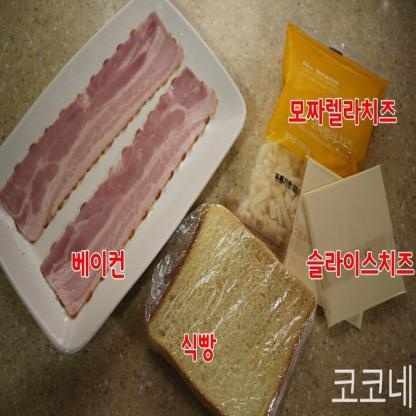

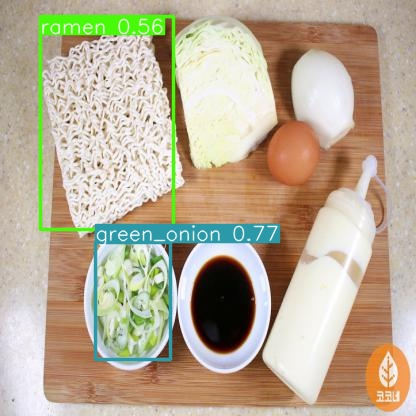

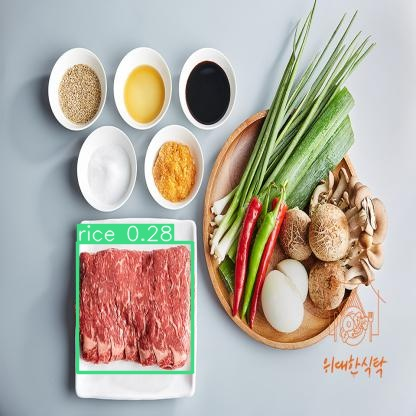

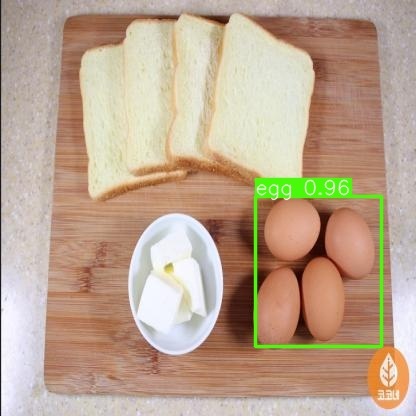

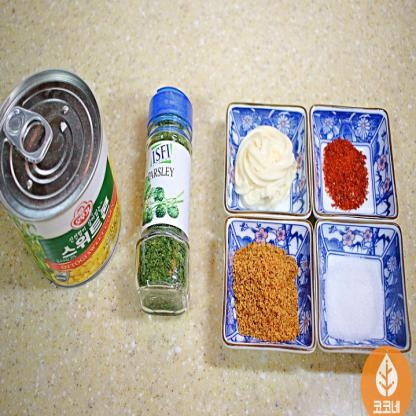

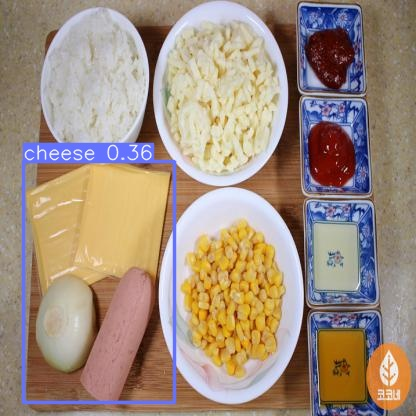

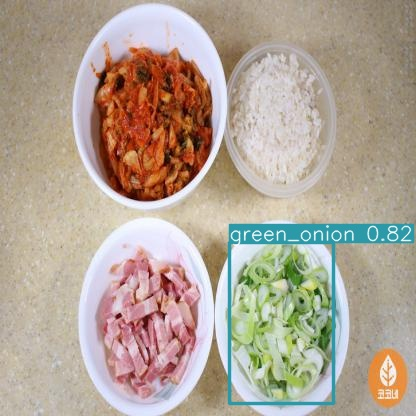

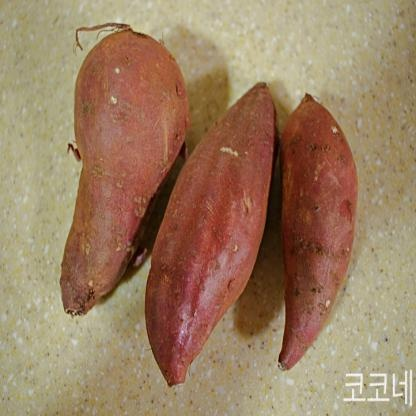

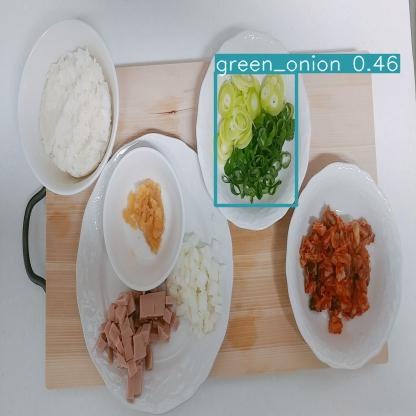

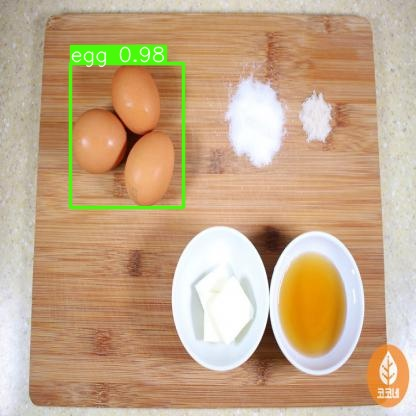

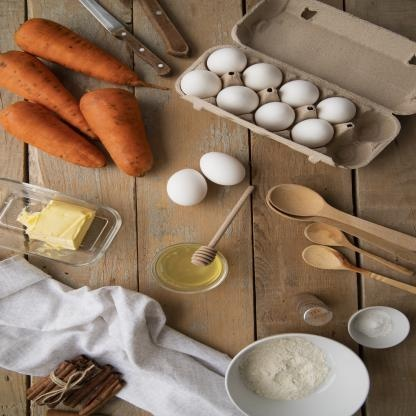

In [41]:
# 테스트 이미지 모두 예측 결과 이미지로 나타내기
from PIL import Image
from IPython.display import display
import os

# 이미지가 저장된 폴더 경로 << 매번 바뀌어야 하는 경로
image_dir = '/home/ubuntu/workdir/ultralytics/Object_Detection_Project/runs/detect/train442'

# 폴더 내의 모든 파일을 순회
for file_name in os.listdir(image_dir) :
    file_path = os.path.join(image_dir,file_name)
    if file_path.endswith('.jpg') :
      with Image.open(file_path) as img:
        display(img)

In [42]:
# 모델을 내보내기
model.save('trained_yolov8n-food.pt')

# 내보낸 모델을 로드하여 사용
model = YOLO('trained_yolov8n-food.pt')

In [43]:
import cv2
from ultralytics import YOLO
import numpy as np

# 학습된 모델을 로드합니다.
model = YOLO('/home/ubuntu/workdir/ultralytics/Object_Detection_Project/food.pt')

# 웹캠 초기화
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 모델을 사용하여 프레임에서 객체 감지
    results = model(frame)

    annotated_frame = frame  # 기본적으로 원본 프레임으로 초기화

    for result in results:
        try:
            # 예측 결과를 그리기
            annotated_frame = result.plot()
        except Exception as e:
            print(f"Error plotting results: {e}")

    # 화면에 표시
    cv2.imshow("YOLOv8 Real-Time Detection", annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 480x640 3 persons, 1 bottle, 1 refrigerator, 218.5ms
Speed: 2.8ms preprocess, 218.5ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 persons, 1 bottle, 1 refrigerator, 4.6ms
Speed: 2.1ms preprocess, 4.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 persons, 1 bottle, 1 refrigerator, 4.1ms
Speed: 1.3ms preprocess, 4.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 persons, 1 bottle, 1 refrigerator, 4.5ms
Speed: 1.3ms preprocess, 4.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 persons, 1 bottle, 1 refrigerator, 4.2ms
Speed: 1.3ms preprocess, 4.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 persons, 1 bottle, 1 refrigerator, 4.3ms
Speed: 1.2ms preprocess, 4.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 persons, 1 bottle, 1 refrigerator, 4.4ms
Speed: 1.4ms preprocess, 4.4ms infe